<a href="https://colab.research.google.com/github/ameliabeddy/PartIA-Computing-Michaelmas/blob/main/Copy_of_01_Exercise_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np

xy_data = np.load('/content/drive/MyDrive/IB-Data-Science/IB-Data-Science-master/Exercises/Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

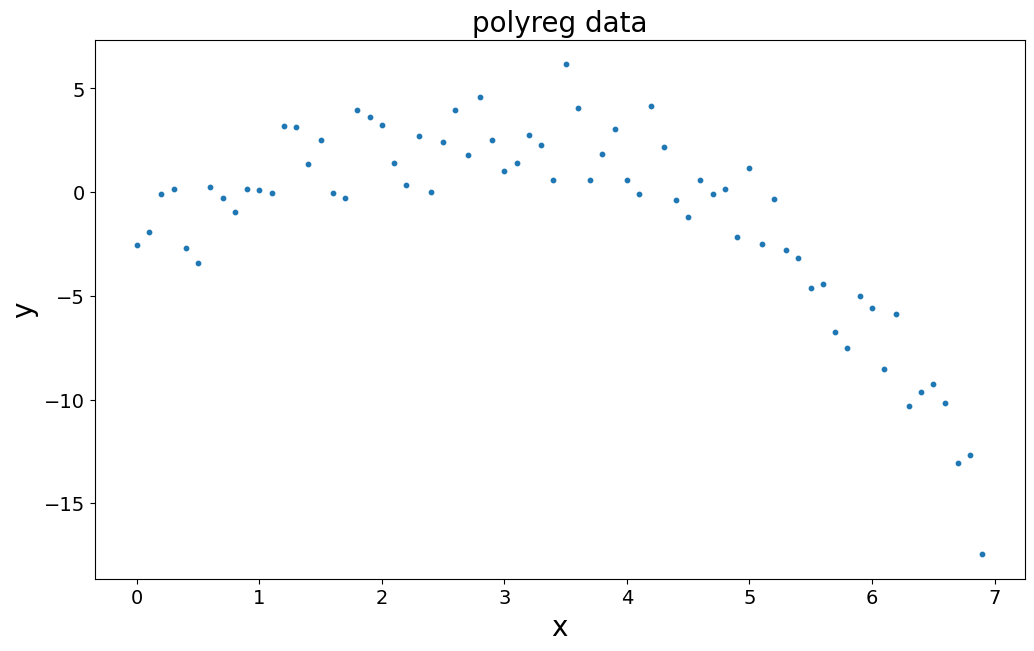

In [ ]:
import matplotlib.pyplot as plt
# Your code for scatterplot here


x = xy_data[:,0]      # First column of array (indexed by 0) contains the dates
y = xy_data[:,1]  # Second column of array (indexed by 1) contains the CO2 levels


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('x')
plt.ylabel('y')
plt.title('polyreg data')
plt.savefig('Ex1_polyreg_data.pdf', bbox_inches = 'tight')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset.
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals.

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [ ]:
def polyreg(data_matrix, k):
    x = data_matrix[:, 0]  # Extract x values from the data matrix
    y = data_matrix[:, 1]  # Extract y values from the data matrix
    N = len(data_matrix)   # Number of data points

    k = max(0, k)

    if k >= N:
        k = N - 1


    # Calculating beta coefficiants
    all_ones = np.ones(np.shape(x))
    X = np.column_stack( [x**i for i in range(k+1)])
    #print('The dimensions of X are',np.shape(X))

    # Computing the coefficient vector beta* using least squares formula
    beta = np.linalg.lstsq(X, y, rcond=None)[0]


    #print('The dimensions of beta are',np.shape(beta))
    #print(beta) # THIS IS THE COEF VECTOR

    #THE FIT
    fit = np.dot(X, beta)
    SSE_2 = np.linalg.norm(y - fit)**2
    MSE_2 = SSE_2/(np.size(y))

    #THE RESIDUALS
    residuals = y - fit

    return beta, fit, residuals

beta, fit, residuals = polyreg(xy_data, 3)
#print("Coefficients:", beta)
#print("Residuals:", residuals)



    # The function should return the the coefficient vector beta, the fit, and the vector of residuals


Use the tests below to check the outputs of the function you have written:

In [ ]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included.
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

SSE for quadratic 172.18102528988547
SSE for cubic 152.4058048891581
SSE for quartic 151.22778969027124
R^2 for the first-order quadratic model =  0.8876
R^2 for the first-order cubic model =  0.9005
R^2 for the first-order quartic model =  0.9013


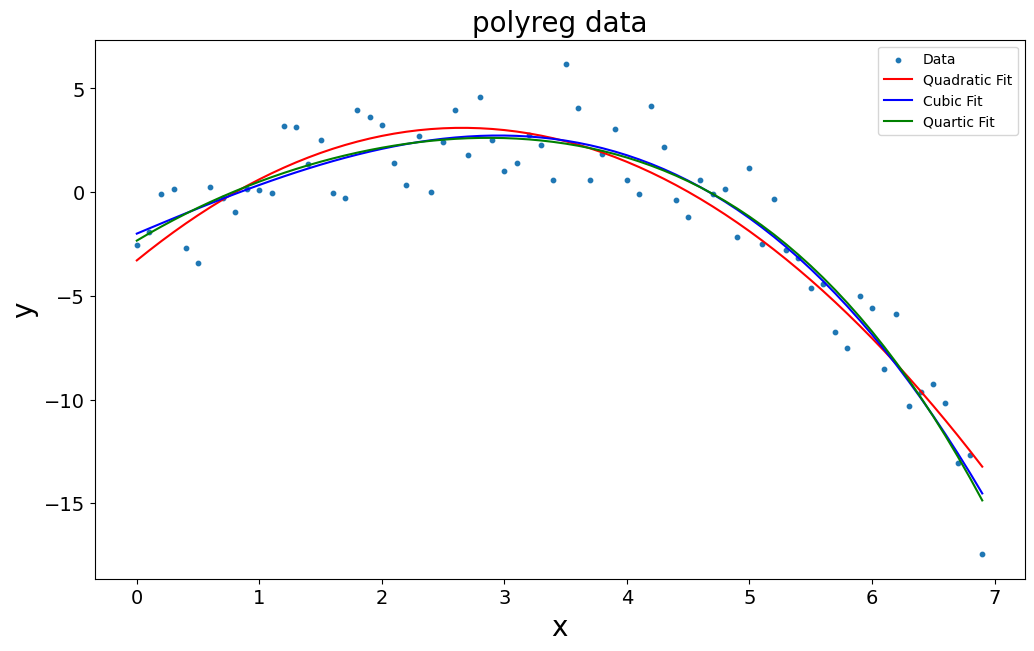

In [ ]:
import matplotlib.pyplot as plt

two = polyreg(xy_data,2)[1]
three = polyreg(xy_data, 3)[1]
four = polyreg(xy_data, 4)[1]
all_ones = np.ones(np.shape(x))


x = xy_data[:,0]      # First column of array (indexed by 0) contains the dates
y = xy_data[:,1]  # Second column of array (indexed by 1) contains the CO2 levels
fit_0 = np.mean(y)*all_ones

SSE_2 = np.linalg.norm(y - polyreg(xy_data,2)[1])**2
SSE_3 = np.linalg.norm(y - polyreg(xy_data,3)[1])**2
SSE_4 = np.linalg.norm(y - polyreg(xy_data,4)[1])**2

SSE_0 = np.linalg.norm(y - fit_0)**2

print("SSE for quadratic", SSE_2)
print("SSE for cubic", SSE_3)
print("SSE for quartic", SSE_4)

print('R^2 for the first-order quadratic model = ', np.round(1- SSE_2/SSE_0, decimals = 4))
print('R^2 for the first-order cubic model = ', np.round(1- SSE_3/SSE_0, decimals = 4))
print('R^2 for the first-order quartic model = ', np.round(1- SSE_4/SSE_0, decimals = 4))

# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10, label = "Data")
plt.plot(x, two, color = 'red', label = "Quadratic Fit")
plt.plot(x, three, color = 'blue', label = "Cubic Fit")
plt.plot(x, four, color = 'green', label = "Quartic Fit")

plt.xlabel('x')
plt.legend()
plt.ylabel('y')
plt.title('polyreg data')
plt.savefig('Ex1_polyreg_data.pdf', bbox_inches = 'tight')
plt.show()





#### State which model you choose and briefly justify your choice.


I pick the quartic graph as I think it captures the noise in the data the best way.



### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot.
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

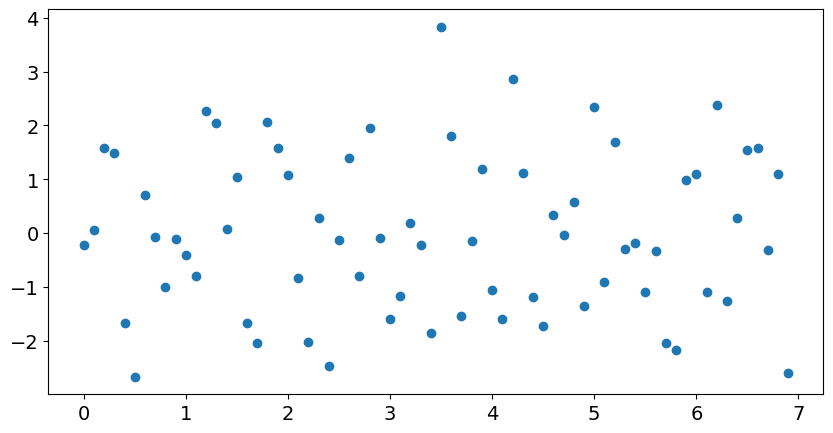

Mean of residuals for quadratic model =  -0.0 Variance of residuals =  2.16


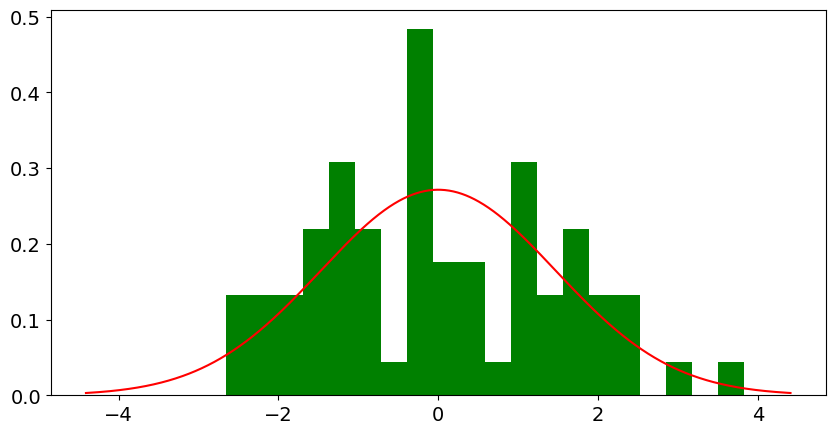

In [ ]:
#Your code here
res  = polyreg(xy_data,4)[2]


plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x, polyreg(xy_data,4)[2])
plt.show()



print('Mean of residuals for quadratic model = ', np.round(np.mean(res), 3),
      'Variance of residuals = ', np.round(np.var(res),3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(res, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(res)  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()